# Data Preprocessing: Sampling

* __Author: Prof. Nagiza F. Samatova__
* __Email: samatova@csc.ncsu.edu__
* __Date: September 25, 2018__

## Install Packages

Install the following packages if required. They most likely came with your Anaconda and/or Python distribution.

```python
    pip3 install numpy
    pip3 install scipy
    pip3 install pylab
    pip3 install matplotlib
```

This code runs using Python3.

## Load Packages

In [3]:
import numpy as np
import pandas as pd

import scipy
from scipy.stats import norm, gaussian_kde
import scipy.stats as stats
import scipy.sparse as _sparse

import matplotlib.pyplot as plt
%matplotlib inline
%precision 4

import pylab as pl

import seaborn as sns

from sklearn import svm

In [4]:
try:
    from sklearn.model_selection import StratifiedShuffleSplit
except:
    print('Need scikit-learn for Stratified shuffle split functionality')

In [5]:
try:
    from sklearn.model_selection import StratifiedKFold
except:
    print('Need scikit-learn for Stratified k-fold functionality')

In [6]:
np.set_printoptions(formatter={'float': lambda x: '%.3f' % x})

## Sample Statistic vs. Population Parameters for the Normal (Gaussian) Distribution

* _Mean_:
    + Population Parameter: mu
    + Sample Statistic: X_bar
* _Variance_:
    + Population Parameter: $sigma^2$
    + Sample Statistic: $S^2$    
* _Standard Deviation_ (sd):
    + Population Parameter: sigma
    + Sample Statistic: S
    + $sd = sqrt(variance)$ 


+ Let's first generate a sample of `size=100` that consists of random numbers drawn from the normal distribution with the following _population parameters_: 
    * mean: `loc=50` and 
    * standard deviation: `scale=10`
+ Next, compute and compare the sample statistic for the sample so generated. 
+ Are the values of the sample statistic equal to the population parameters? 
+ Run this code snippet below several times and observe how the reported sample statistic varies from the population parameters of the underlying distribution used for drawing this sample

In [7]:
rand_normal = stats.norm.rvs(loc=50, scale=10, size=100)

# Sample mean and standard deviation
print ("Sample Statistic: Mean: ", rand_normal.mean())
print ("Sample Statistic: Standard Deviation: ", rand_normal.std())
type (rand_normal)

('Sample Statistic: Mean: ', 50.913602413573315)
('Sample Statistic: Standard Deviation: ', 10.774099621967856)


numpy.ndarray

+ Let's generate `n_samples = 1000` samples of `size=100`, each consisting of random numbers drawn from the normal distribution with the same population parameters: 
    * mean of `loc=50` and 
    * standard deviation of `scale=10`
+ Compute the means of these samples and store them in a list, `m_estimates`
+ Visualize the histogram of these means
+ Report the _standard error_, or the variance of the sample means

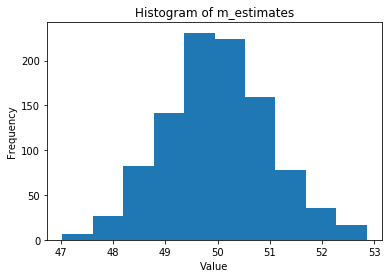

list

In [6]:
# population mean estimates
n_samples = 1000
mean = 50
sd = 10
sample_size = 100

m_estimates = [stats.norm.rvs(loc=mean, 
                              scale=sd, 
                              size=sample_size).mean() 
               for _ in range(n_samples)]

plt.hist(m_estimates)
plt.title("Histogram of m_estimates")
plt.xlabel("Value")
plt.ylabel("Frequency")
#plt.gcf()
plt.show()

type (m_estimates)

In [7]:
print ("Mean of sample means: ", np.array(m_estimates).mean())
print ("Standard Error: ", np.array(m_estimates).var())

Mean of sample means:  50.001128195756635
Standard Error:  0.9918739199663034


In [15]:
plt.gcf?

***
## Explore Unit Normal Distribution

The parameters of the _unit normal_:
+ mean = 0
+ standard deviation = 1

In [8]:
# Generate 1000 points drawn 
# from the unit normal distribution: N( 1.0, 0.0)
mean = 0.0
sd = 1.0
randUnitNormal = scipy.stats.norm.rvs(loc=mean, 
                                      scale=sd, 
                                      size=100)
randUnitNormal[0:3]

array([0.070, 0.110, -0.025])

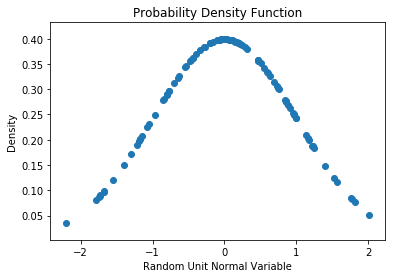

In [9]:
# Calculate and plot their probability density functions
densityRandUnitNormal = stats.norm.pdf(randUnitNormal)

x = np.linspace(norm.ppf(0.01), stats.norm.ppf(0.99), 100)
plt.scatter(randUnitNormal, densityRandUnitNormal)
plt.title("Probability Density Function")
plt.xlabel("Random Unit Normal Variable")
plt.ylabel("Density")
plt.show()

In [66]:
stats.norm.ppf?

In [10]:
# Compute the probability that x is less than 1.64
stats.norm.cdf(1.64)

0.9495

In [11]:
# Compute the probability that x lies between -1.96 and 1.96
stats.norm.cdf(1.96) - stats.norm.cdf(-1.96)

0.9500

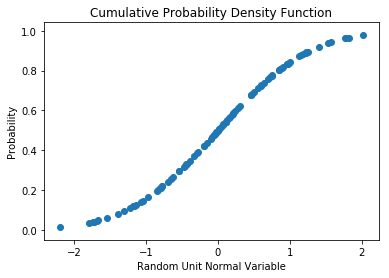

In [12]:
# Compute and plot cumulative probability distribution
probabilityRandUnitNormal = stats.norm.cdf(randUnitNormal)

# Plot the distribution
x = np.linspace(norm.ppf(0.01), stats.norm.ppf(0.99), 1000)    
plt.scatter(randUnitNormal, probabilityRandUnitNormal)
plt.title("Cumulative Probability Density Function")
plt.xlabel("Random Unit Normal Variable")
plt.ylabel("Probability")
plt.show()

In [13]:
print (1 - stats.norm.cdf(1.96))

0.024997895148220484


***
## Explore `t`-Distribution

In [14]:
# Generate n random numbers from the t-distribution
# with n degrees of freedom
n = 1000
degf = n
tRandom = stats.t.rvs(df=degf, size=n)

In [15]:
# Confirm that the empirical mean is zero and 
# the variance is n / (n-2)
print (tRandom.mean())
print (tRandom.var())

-0.008930205425008697
0.9720523775332708


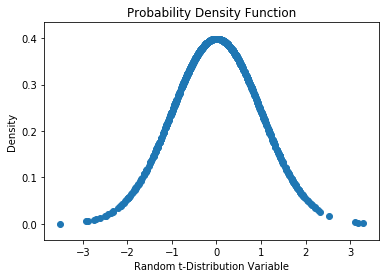

In [16]:
# Compute and Plot the t-distribution
densityTRandom = stats.t.pdf(tRandom, df=degf)
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 1000)    
plt.scatter(tRandom, densityTRandom)
plt.title("Probability Density Function")
plt.xlabel("Random t-Distribution Variable")
plt.ylabel("Density")
plt.show()

Use a Shapiro-Wilk test to check whether `tRandom` is from the normal distribution when the $p$-value is lower than 0.05; if not, then conclude that the sample deviates from normality.

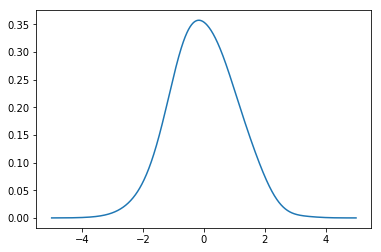

(0.9976522326469421, 0.16550886631011963)


In [17]:
density = gaussian_kde(tRandom)
xs = np.linspace(-5,5,1000)
density.covariance_factor = lambda : .5
density._compute_covariance()
plt.plot(xs,density(xs))
plt.show()

print (stats.shapiro(tRandom))

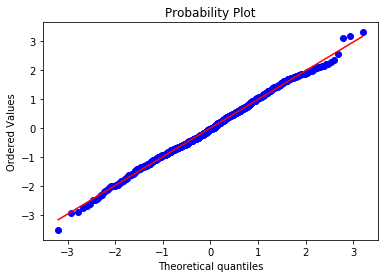

In [18]:
# Plot using the qqnorm()
stats.probplot(tRandom, dist="norm", plot=pl)
pl.show()

***
## Explore $\chi^2$-Distribution

In [19]:
# Generate n random numbers from the Chi-squared-distribution with n degrees of freedom.
n = 1000
df = 7
chiSquaredRandom = stats.chi2.rvs(df=df, size=n)

In [20]:
# Confirm that the empirical mean is n  and the variance is 2n 
print (chiSquaredRandom.mean())
print (chiSquaredRandom.var())

7.008627181730305
13.646479115477813


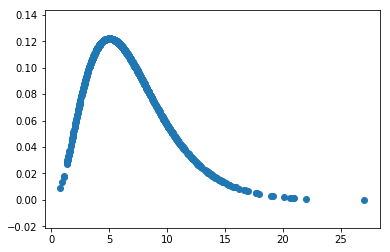

In [21]:
# Compute and Plot the chi-squared-distribution
densityChiSquared = stats.chi2.pdf(chiSquaredRandom, df=df)
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 1000)    
plt.scatter(chiSquaredRandom, densityChiSquared)
plt.show()

In [61]:
stats.chi2.rvs?

In [ ]:
stats.chi2.pdf?

In [ ]:
stats.chi2.cdf?

***
## Bootstrap Sampling

The functions below are extracted from the `bootstrap-tools` package: 
+ Download and unzip the module from the following link: http://gcalmettes.github.io/bootstrap-tools/.

In [22]:
def bootstrap(data, nboot=10000, replacement=True):
    """
        Generate n=nboot bootstrap samples of the data with/without replacement,
        and return a 2D numpy array of them.

        Input:    data (anything numpy can handle as a numpy array)
        Output:   2D numpy array of size (nboot x length of data)
    """

    # Ensure that our data is a 1D array.
    data = np.ravel(data)

    # Create a 2D array of bootstrap samples indexes
    if replacement==True: # with replacement (note: 50x-ish faster than without)
        idx = np.random.randint(data.size, size=(nboot, data.size))
    elif replacement==False: # without replacement
        idx = np.vstack([np.random.permutation(data.size) for x in np.arange(nboot)])

    return data[idx]


In [23]:
def bootci(data, stat=np.median, nboot=1000, replacement=True, alpha=0.05, method='pi',
           keepboot=False):
    """
        Compute the (1-alpha) confidence interval of a statistic (i.e.: mean, median, etc)
        of the data using bootstrap resampling.
        
        Arguments:
            stat:        statistics we want the confidence interval for (must be a function)
            nboot:       number of bootstrap samples to generate
            replacement: resampling done with (True) or without (False) replacement
            alpha:       level of confidence interval
            method:      type of bootstrap we want to perform
            keepboot:    if True, return the nboot bootstrap statistics from which
                         the confidence intervals are extracted
        
        Methods available:
            - 'pi' = Percentile Interval
            - 'bca' = Bias-Corrected Accelerated Interval (available soon)
    """

    # apply bootstrap to data
    boot = bootstrap(data, nboot=nboot, replacement=replacement)

    # calculate the statistics for each bootstrap sample and sort them
    sorted_stat = np.sort(stat(boot, axis=1))

    # Percentile Interval method (for the moment the only one available) 
    if method == 'pi':
        ci = (sorted_stat[np.round(nboot*alpha/2).astype(int)], 
              sorted_stat[np.round(nboot*(1-alpha/2)).astype(int)])

    if keepboot == True:
        return ci, sorted_stat
    else:
        return ci

In [86]:
bootci?

**Estimate confidence interval on the obtained statistic (e.g., median)**

In [24]:
loans_income = pd.read_csv("../data_raw/data_prep_sampling_loans_income.csv")
loans_income.head()

x
0   67000
1   52000
2  100000
3   78762
4   37041

In [25]:
loans_income.describe()

x
count   50000.00000
mean    68760.51844
std     32872.03537
min      4000.00000
25%     45000.00000
50%     62000.00000
75%     85000.00000
max    199000.00000

In [26]:
loans_income = pd.read_csv("../data_raw/data_prep_sampling_loans_income.csv")
ci = bootci(data = loans_income, 
            stat = np.median, 
            alpha = 0.05)

print ("Estimate of the Median Income: ", loans_income.median())
print ("The 95% confidence interval for the estimated median: ", ci)

Estimate of the Median Income:  x    62000.0
dtype: float64
The 95% confidence interval for the estimated median:  (61044.0, 62000.0)


***
## Sampling Strategies

+ _Simple Random Sample_:
    * Assumptions: population is homogeneous
    * Pros: Simple in theory; Unbiased; Makes statistical inference possible
    * Cons: Complex or inefficient in practice; Does not guarantee a completely random sample
+ _Stratified Random Sample_:
    * Assumptions: population is divided into subgroups called strata, with important differences across strata
    * Pros: usually increases precision; allows separate estimates per stratum; convenient/easier/cheaper 
    * Cons: requires knowledge of auxiliary variable; complicates analysis
+ _Cluster Sample_:
    * Assumptions: observational units are not directly accessible; clusters are representative of populations
    * Pros: cheaper, easier, more convenient than SRS; only need a list of clusters (not all observations)
    * Cons: strong dependence within clusters may lead to inefficiency more complex analysis than SRS 
+ _Systematic Sample_:
    * Assumptions: population is homogenous or strata/clusters are systematically arranged
    * Pros: easy to implement; useful for data over time; convenient/cheap
    * Cons: can be biased if not carefully selected (seasonality, periodicity); accuracy depends on the order of sampling units; never an SRS

Let's load the original data set from the customer satisfaction survey:

In [27]:
file = "../data_raw/data_prep_sampling_customer_satisfaction.csv"
cust_sat = pd.read_csv(file)
cust_sat.head(2)

ID    size  sizecount      score
0  1027  Medium        500  60.457983
1   257   Large        500  60.394796

In [28]:
cust_sat.shape

(2500, 4)

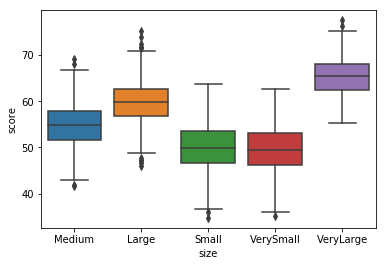

In [29]:
sns.boxplot( x="size", 
             y="score",
             data = cust_sat )
plt.show()

### SRS: Simple Random Sampling with `pandas.DataFrame.sample()`

In [112]:
pd.DataFrame.sample?

+ Draw a simple random sample of size n=200 without replacement
+ Check whether the boxplot of the sample loooks similar to the boxplot of the original sata set

In [30]:
# Draw a simple random sample of size n=200 without replacement
# cust_sat_srs = cust_sat.sample(frac=0.1, replace=False)
cust_sat_srs = cust_sat.sample(
    n=200, replace=False)
cust_sat_srs.shape

(200, 4)

In [47]:
sns.boxplot?

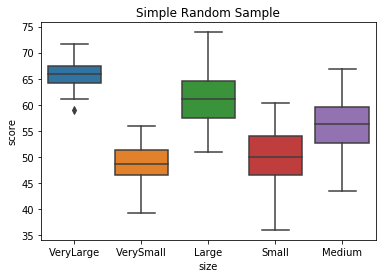

In [31]:
sns.boxplot( x="size", 
             y="score",
             data = cust_sat_srs )
plt.title("Simple Random Sample")
plt.show()

### Stratified Random Sampling 

Let's look at an example of how stratified sampling can be used with k-fold cross-validation for building and validating a predictive model.

In [32]:
spam_df = pd.read_csv("../data_raw/data_prep_sampling_spam.csv")
spam_df.shape

(4601, 58)

In [33]:
spam_df.head(3)

make  address   all  num3d   our  over  remove  internet  order  mail  \
0  0.00     0.64  0.64    0.0  0.32  0.00    0.00      0.00   0.00  0.00   
1  0.21     0.28  0.50    0.0  0.14  0.28    0.21      0.07   0.00  0.94   
2  0.06     0.00  0.71    0.0  1.23  0.19    0.19      0.12   0.64  0.25   

   ...   charSemicolon  charRoundbracket  charSquarebracket  charExclamation  \
0  ...            0.00             0.000                0.0            0.778   
1  ...            0.00             0.132                0.0            0.372   
2  ...            0.01             0.143                0.0            0.276   

   charDollar  charHash  capitalAve  capitalLong  capitalTotal  type  
0       0.000     0.000       3.756           61           278  spam  
1       0.180     0.048       5.114          101          1028  spam  
2       0.184     0.010       9.821          485          2259  spam  

[3 rows x 58 columns]

In [34]:
spam_df.columns

Index(['make', 'address', 'all', 'num3d', 'our', 'over', 'remove', 'internet',
       'order', 'mail', 'receive', 'will', 'people', 'report', 'addresses',
       'free', 'business', 'email', 'you', 'credit', 'your', 'font', 'num000',
       'money', 'hp', 'hpl', 'george', 'num650', 'lab', 'labs', 'telnet',
       'num857', 'data', 'num415', 'num85', 'technology', 'num1999', 'parts',
       'pm', 'direct', 'cs', 'meeting', 'original', 'project', 're', 'edu',
       'table', 'conference', 'charSemicolon', 'charRoundbracket',
       'charSquarebracket', 'charExclamation', 'charDollar', 'charHash',
       'capitalAve', 'capitalLong', 'capitalTotal', 'type'],
      dtype='object')

In [35]:
spam_df.type.describe()

count        4601
unique          2
top       nonspam
freq         2788
Name: type, dtype: object

In [36]:
vars_2_keep = ["type"]
class_labels = spam_df.filter(items=vars_2_keep)
class_labels.describe()

type
count      4601
unique        2
top     nonspam
freq       2788

In [37]:
vars_2_drop =["type"]

data_df = spam_df.drop(vars_2_drop, axis=1)
data_df.shape

(4601, 57)

In [38]:
skf = StratifiedKFold(n_splits=3)
skf

StratifiedKFold(n_splits=3, random_state=None, shuffle=False)

In [39]:
for train_index, test_index in skf.split(X = data_df, y = class_labels):
    print("TRAIN: ", len(train_index), "TEST: ", len(test_index))
    X_train, X_test = data_df.iloc[train_index], data_df.iloc[test_index]
    y_train, y_test = class_labels.iloc[train_index], class_labels.iloc[test_index]
    print ("\nTRAIN: ", y_train.describe())
    print ("\nTEST: ", y_test.describe())
    print ("--------------\n")

TRAIN:  3066 TEST:  1535

TRAIN:             type
count      3066
unique        2
top     nonspam
freq       1858

TEST:             type
count      1535
unique        2
top     nonspam
freq        930
--------------

TRAIN:  3068 TEST:  1533

TRAIN:             type
count      3068
unique        2
top     nonspam
freq       1859

TEST:             type
count      1533
unique        2
top     nonspam
freq        929
--------------

TRAIN:  3068 TEST:  1533

TRAIN:             type
count      3068
unique        2
top     nonspam
freq       1859

TEST:             type
count      1533
unique        2
top     nonspam
freq        929
--------------



In [132]:
StratifiedKFold?

In [107]:
StratifiedShuffleSplit?
# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

In [40]:
try:
    from sklearn.model_selection import StratifiedShuffleSplit
except:
    print('Need scikit-learn for Stratified shuffle split functionality')

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn import preprocessing

def model_build_validate(data_df, labels, model, pos_label, k_fold = 5):
    '''
    k-fold cross-validation with stratified sampling.
    '''
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    sss = StratifiedShuffleSplit(n_splits=k_fold)
    
    for train_index, test_index in sss.split(data_df, labels):
        x_train, x_test = data_df.iloc[train_index], data_df.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        
        # build a model
        model.fit(x_train, y_train.ravel())
        
        # test the model
        y_pred = model.predict(x_test)
        
        # measure performance metrics for the model
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred, pos_label=pos_label))
        recall_scores.append(recall_score(y_test, y_pred, pos_label=pos_label))
        f1_scores.append(f1_score(y_test, y_pred, pos_label=pos_label))

    print('Accuracy', np.mean(accuracy_scores))
    print('Precision', np.mean(precision_scores))
    print('Recall', np.mean(recall_scores))
    print('F1-measure', np.mean(f1_scores)) 

In [41]:
# Build an SVM model over stratified samples
try:
    from sklearn.svm import SVC
except:
    print('Need sklearn.svm for C-Support Vector Classification.')
    
np.random.seed(2018)
model_svm = SVC()

model_build_validate (data_df, np.array(class_labels), 
                      model_svm, pos_label='spam', k_fold = 2)

Accuracy 0.8405639913232104
Precision 0.7772936620086879
Recall 0.8351648351648352
F1-measure 0.8051578947368422


In [42]:
# Build a logistic regression model over stratified samples
try:
    from sklearn.linear_model import LogisticRegression
except:
    print('Need sklearn.linear_model for LogisticRegression model')
np.random.seed(2018)    
model_logit = LogisticRegression()
model_build_validate (data_df, np.array(class_labels), 
                      model_logit, pos_label='spam', k_fold = 2)

Accuracy 0.9251626898047722
Precision 0.9109382762046696
Recall 0.8983516483516483
F1-measure 0.9045151909390067
